# Install the Necessary Libraries

Name : Pratik Yuvraj Yawalkar

Roll No.  : AI23MTECH11006

Department : AI & ML

In [1]:
!pip install astroML numpy pandas scipy matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.9 MB/s eta 0:00:00


# 1. Download the asteroid dataset from http://astrostatistics.psu.edu/datasets/asteroid_dens.dat. Apply the Shapiro-Wilk test to both the asteroid density values and the natural logarithm of the density values. From the p values, which of these is closer to a Gaussian distribution? Verify this by plotting histograms of both density and its logarithm and overlaying the best-fit normal distribution (Look up stats.norm.fit)

In [2]:
import numpy as np
from scipy.stats import shapiro, norm
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the file
data = pd.read_csv('asteroid_dens.dat', delim_whitespace=True, skiprows=1, header=None)
asteroid_number = data[0].values
asteroid_name = data[1].values
asteroid_density = data[2].values
asteroid_density_error = data[3].values

In [3]:
asteroid_density

array([2.12, 2.71, 3.44, 2.76, 2.72, 0.96, 2.  , 3.26, 2.5 , 1.2 , 1.62,
       1.3 , 1.96, 2.6 , 1.3 , 2.67, 4.4 , 1.8 , 4.9 , 2.39, 1.62, 1.47,
       0.89, 2.52, 1.21, 0.9 , 0.8 ])

In [4]:
# Compute the natural logarithm of density values without the errors
log_density_values = np.log(asteroid_density)
log_density_values

array([ 0.75141609,  0.99694863,  1.23547147,  1.01523068,  1.00063188,
       -0.04082199,  0.69314718,  1.1817272 ,  0.91629073,  0.18232156,
        0.48242615,  0.26236426,  0.67294447,  0.95551145,  0.26236426,
        0.98207847,  1.48160454,  0.58778666,  1.58923521,  0.87129337,
        0.48242615,  0.3852624 , -0.11653382,  0.9242589 ,  0.19062036,
       -0.10536052, -0.22314355])

Define the test parameters:

1. Alpha = 5%
2. Null Hypothesis: Samples comes from a certain Normal Distribution
3. Alternate Hypothesis: Samples does not comes from a certain Normal Distribution

In [5]:
# Shapiro-Wilk test for density values with errors
shapiro_test_asteroid_density, shapiro_test_asteroid_density_p_value = shapiro(asteroid_density)

print("Shapiro-Wilk test results for density values:")
print("Test Statistic:", shapiro_test_asteroid_density, "\np-value:", shapiro_test_asteroid_density_p_value)

# Fail to reject the null Hypothesis as p_value obtained > alpha

Shapiro-Wilk test results for density values:
Test Statistic: 0.9246721863746643 
p-value: 0.051220282912254333


In [6]:
# Shapiro-Wilk test for natural logarithm of density values with errors
shapiro_test_asteroid_density_log, shapiro_test_asteroid_density_log_p_value = shapiro(log_density_values)

print("Shapiro-Wilk test results for log density values:")
print("Test Statistic:", shapiro_test_asteroid_density_log, "\np-value:", shapiro_test_asteroid_density_log_p_value)

# Fail to reject the null Hypothesis as p_value obtained > alpha

Shapiro-Wilk test results for log density values:
Test Statistic: 0.9686306715011597 
p-value: 0.5660613775253296


Question :
1. The Shapiro–Wilk test statistic (Calc W) is basically a measure of how well the ordered and standardized sample quantiles fit the standard normal quantiles. It takes a value between 0 and 1.

2. We know that large p-value indicates the data set is normally distributed and a low p-value indicates that it isn’t normally distributed.

Solution :
1. The results shows that log of asteroid density values fits better to its normal curve that the original density values.

2. The results shows that log of asteroid density values have more p-value than its original density values which indicates a good fit of its values to a Normal Distribution

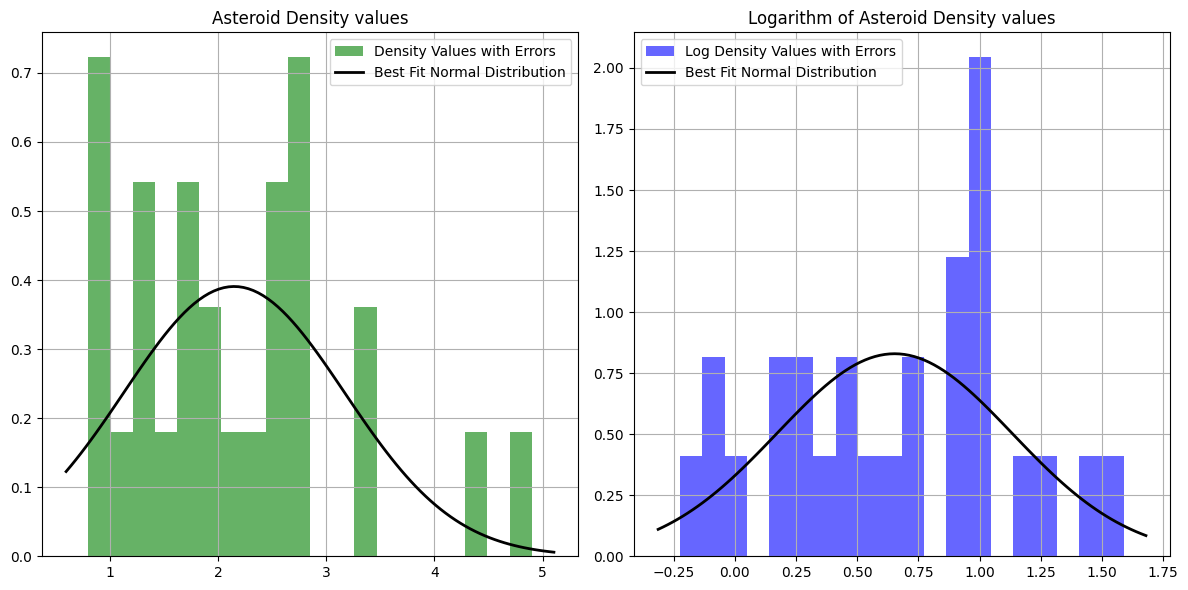

In [7]:
# Plot histograms and overlay best-fit normal distribution
plt.figure(figsize=(12, 6))

# Histogram and best-fit normal for density values
plt.subplot(1, 2, 1)
plt.hist(asteroid_density, bins=20, density=True, alpha=0.6, color='g', label='Density Values with Errors')
mu, sigma = norm.fit(asteroid_density)
xmin, xmax = plt.xlim()
x_density = np.linspace(xmin, xmax, 100)
p_density = norm.pdf(x_density, mu, sigma)
plt.plot(x_density, p_density, 'k', linewidth=2, label='Best Fit Normal Distribution')
plt.title('Asteroid Density values')
plt.grid(True)
plt.legend()

# Histogram and best-fit normal for log density values
plt.subplot(1, 2, 2)
plt.hist(log_density_values, bins=20, density=True, alpha=0.6, color='b', label='Log Density Values with Errors')
mu_log, sigma_log = norm.fit(log_density_values)
xmin_log, xmax_log = plt.xlim()
x_log_density = np.linspace(xmin_log, xmax_log, 100)
p_log_density = norm.pdf(x_log_density, mu_log, sigma_log)
plt.plot(x_log_density, p_log_density, 'k', linewidth=2, label='Best Fit Normal Distribution')
plt.title('Logarithm of Asteroid Density values')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# 2. Download the Hipparcos star catalog from http://iith.ac.in/~shantanud/HIP_star.dat. Detailed explanation of the columns in this dataset can be found in http://astrostatistics.psu.edu/datasets/HIP_star.html under “Dataset”. Calculate using two-sample t-test whether the color (B-V) of the Hyades stars differs from the non-Hyades ones. The Hyades stars have Right Ascension between 50◦ and 100◦, declinations between 0 and 25◦, proper motion in RA between 90 and 130 mas/year, proper motion in DEC between -60 and -10 mas/year. Any other star which does not satisfy any of the above conditions is considered a non-Hyades star.


In [8]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

# To give the appropriate column name to the columns of dataframe
columns_names = ['HIP', 'Vmag', 'RA', 'DE', 'Plx', 'pmRA', 'pmDE', 'e_Plx', 'B-V']

# Load the data from the file
data = pd.read_csv('HIP_star.dat', delim_whitespace=True, skiprows=1, header=None)
data.columns = columns_names
data.head()

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068


In [9]:
data.describe()

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
count,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2678.000000
mean,56549.482898,8.259386,173.452997,-0.139766,22.198021,5.376135,-63.941993,1.626793,0.761530
std,35587.306121,1.884730,107.546849,38.930387,1.417193,160.979855,140.890423,2.212867,0.318188
min,2.000000,0.450000,0.003797,-87.202730,20.000000,-868.010000,-1392.300000,0.450000,-0.158000
25%,21770.000000,7.050000,70.141368,-31.363474,20.980000,-91.980000,-130.790000,0.870000,0.560000
50%,56413.000000,8.280000,173.369788,3.254234,22.100000,10.550000,-49.480000,1.140000,0.710500
75%,87096.000000,9.610000,266.923319,28.070456,23.355000,103.870000,8.570000,1.680000,0.953000
max,120003.000000,12.740000,359.954685,88.302681,25.000000,781.340000,481.190000,46.910000,2.800000


In [10]:
# Replace all the nan values by the median of the rest of values if there are some nan values
if(pd.isna(data).sum().sum()):
    for column in data.columns:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)

In [11]:
# Define criteria for Hyades stars and non-Hyades stars
hyades_criteria = (
    (data['RA'] >= 50) & (data['RA'] <= 100) &
    (data['DE'] >= 0) & (data['DE'] <= 25) &
    (data['pmRA'] >= 90) & (data['pmRA'] <= 130) &
    (data['pmDE'] >= -60) & (data['pmDE'] <= -10)
)

# Apply the criteria to filter Hyades and non-Hyades stars
hyades_stars = data[hyades_criteria]
non_hyades_stars = data[~hyades_criteria]

In [12]:
hyades_stars.head()

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
532,18735,5.89,60.202858,18.194069,21.99,129.49,-28.27,0.81,0.319
536,18946,10.12,60.912353,19.455094,23.07,119.02,-34.19,2.12,1.095
540,19148,7.85,61.566899,15.698168,21.41,118.53,-19.59,1.47,0.593
542,19207,10.49,61.754794,15.335078,23.57,122.63,-18.96,2.26,1.180
544,19261,6.02,61.924609,15.162843,21.27,127.06,-22.75,1.03,0.397


In [13]:
non_hyades_stars.head()

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068


In [14]:
# Extract the color (B-V) values for both groups
hyades_color = hyades_stars['B-V']
hyades_color = hyades_color.values

non_hyades_color = non_hyades_stars['B-V']
non_hyades_color = non_hyades_color.values

Define the test parameters:

1. Alpha = 5%
2. Null Hypothesis: There is no difference between color (B-V)
3. Alternate Hypothesis: There is difference between color (B-V)

In [15]:
# Perform two-sample t-test
t_stat, p_value = ttest_ind(hyades_color, non_hyades_color, equal_var=False)

print("Two-sample t-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Pass to reject the null hypothesis as p_value obtained < alpha

Two-sample t-test results:
T-statistic: -4.202327212391445
P-value: 5.82998684016138e-05


Question :
1. The T-test is a test for the null hypothesis that 2 independent samples have identical average (expected) values.


2.  The p-value quantifies the probability of observing as or more extreme values assuming the null hypothesis, that the samples are drawn from populations with the same population means, is true.

Solution :
1. The results gives a significant difference bet'n mean of t-distribution and currrent t_stat value.

2. The results shows that there is a significant difference between both hyades color and non hyades color

# 3. The T90 distribution for Beppo-Sax T90 data can be found at http://www.iith.ac.in/~shantanud/beppoSax.txt. Apply GMM to log10 of T90 data and find the optimum number of components using AIC and BIC by plotting BIC as a function of number of componts (20 points) (Hint: Look at the source code for astroML figure 6.6)

In [16]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


# Load the data from the file
data = np.loadtxt('beppoSax.dat')
data

array([  3.  ,  11.  ,  14.  , ..., 109.  ,   4.45,  36.  ])

In [17]:
# Take the log10 of T90
logT90 = np.log10(data)
logT90

array([0.47712125, 1.04139269, 1.14612804, ..., 2.0374265 , 0.64836001,
       1.5563025 ])

In [18]:
# Define the range of components to consider
n_components = np.arange(1, 21)

# Initialize arrays to store AIC and BIC values
AIC = np.zeros(n_components.shape)
BIC = np.zeros(n_components.shape)

# Fit models and compute AIC and BIC
for i, n in enumerate(n_components):
    # Fit a Gaussian mixture model
    gmm = GaussianMixture(n_components=n, random_state=0).fit(logT90.reshape(-1, 1))

    # Calculate AIC and BIC
    AIC[i] = gmm.aic(logT90.reshape(-1, 1))
    BIC[i] = gmm.bic(logT90.reshape(-1, 1))

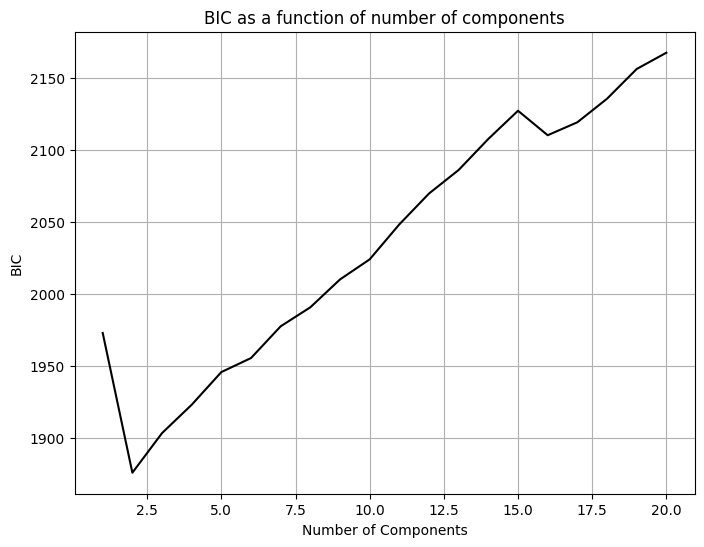

In [19]:
# Plot BIC as a function of the number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components, BIC, '-k')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.title('BIC as a function of number of components')
plt.grid(True)
plt.show()

Hence the number of components used are 2 for the GMM.